<a href="https://colab.research.google.com/github/Krahjotdaan/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная классификация (проверь свой конспект)

Мы освоили линейные модели для задач регрессии, то есть для прогнозирования вещественного числа.

Давайте посмотрим, как использовать линейные модели для решения задач классификации.
На примере бинарной классификации, то есть предсказания меток -1 и 1.

Линейную функцию мы будем использовать, чтобы разделить объекты на два класса:

предположим, что они расположены таким образом, что есть некая линия, такая что с одной стороны находятся скорее всего все объекты одного класса, а с другой почти все объекты другого класса, за исключением некой статистической погрешности или выбросов

и у этой линии будет линейное уравнение
$$0 = w_0 + w_1 x_1 + w_2 x_2 $$

Если же объекты описаны большим количеством признаков,  то это будет не прямая, а некая гиперплоскость, которая будет разделять наши два класса, и ее уровнение
$$0 = w_0 + w_1 x_1 + ... + w_N x_N = \langle w,X\rangle $$


Поскольку уравнение $ \langle w,X\rangle = 0$ описывает гиперплоскольсть в пространстве признаков, то для точек по одну сторону от этой плоскости такое скалярное произведение будет больше нуля, а для точек по другую сторону - меньше нуля

и чем больше $\langle w,X\rangle$ по модулю, тем дальше отбъект находится от разделяющей гиперплоскости

А значит мы можем взять функцию знака от скалярного произведения:

$$a(x) =  sign \langle w,X\rangle =  sign \left( w_0 + \sum^N_{i=1}w_i x_i \right)$$


Таким образом линейный классификатор относит объекты по разные стороны от плоскости к разным классам, и чем дальше точка от плоскости, тем увереннее классификатор дает прогноз.

Получив прогноз для конкретной точки $sign \langle w, x_i\rangle$
и умножив его на правильный ответ (+1  или -1) для нее
$$ y_i sign \langle w, x_i\rangle$$
мы получим  1  для верного прогноза (то есть знак предсказания совпадает со знаком верного ответа) и   -1  если классификатор ошибся.

Величина $$M_i = y_i\langle w,x_i\rangle$$ называется **отступ**

Чем дальше отступ от нуля, тем увереннее классификатор дает прогноз.
Если отступ  положителен, то классификатор дает верный ответ, если отрицателен, то ошибается

Если отступ для некоторого объекта и отрицательный и большой по модулю, это значит, что алгоритм неправильно описывает данные: либо этот объект является выбросом, либо алгоритм не пригоден для решения данной задачи.

### Итак...

- Линейный классификатор разделяет два класса гиперплоскостью
- Чем больше отступ по модулю, тем дальше объект от гиперплоскости
- Знак отступа говорит о корректности предсказания


## Обучение линейного классификатора
заключается в подборе такого положения гиперплоскости, при котором классы разделяются наилучшим образом.

### Ошибка линейной классификации

В случае линейной классификации естественный способ определить качество алгоритма — вычислить для объектов обучающей выборки долю неправильных ответов:

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}\left[a(x_i) \neq y_i\right] $$

здесь квадратные скобки означают 1 если выражение внутри этих скобок истино и 0 если оно ложно

$$
\left[  P\right] = \left\{
    \begin{array}\\
        1 & \mbox{,  P is true} \\
        0 & \mbox{, P is false } \\
    \end{array}
\right.
$$

или то же самое через отступ:  

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}\left[M_i<0\right] = \frac{1}{l}\sum^l_{i=1}\left[y_i\langle w,x_i\rangle<0\right]$$

Функция, стоящая под знаком суммы, называется функцией потерь. В данном случае это пороговая функция потерь.

Такая функция является разрывной в точке 0, что делает невозможным применение метода градиентного спуска.

Возьмем любую гладкую оценку пороговой функции и будем минимизировать не долю неправильных ответов, а некоторую функцию, которая является оценкой сверху

### Примеры таких гладких функций:

- Логистическая функция потерь (используется в логистической регрессии, о которой речь и пойдет сегодня):

$L ̃(M) = \log_2 (1+exp(−M))$
- Экспоненциальная функция потерь:

$  L ̃(M) = exp(−M)$

- Кусочно-линейная функция потерь (используется в методе опорных векторов):

$L ̃ (M ) = max(0, 1 − M )$


В случае логистической функции потерь функционал ошибки имеет вид:

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}\log_{2} \left(1+exp \left(-M_i\right)\right) = \frac{1}{l}\sum^l_{i=1}\log_{2} \left(1+exp \left(-y_i\langle w,x_i\rangle\right)\right)$$
Получившееся выражение является гладким, а, следовательно при обучении, можно использовать, метод градиентного спуска.

С переобучением же будем бороться регуляризацией.

# Логистическая регрессия - ПРАКТИКА

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier

import datetime

## Практика 1 - предсказываем погоду в Австралии

### Шаг 1 -  Готовим данные
- Загрузите датасет  **weatherAUS.csv**
- Посмотрите на типы данных у признаков
- Сформируйте тренировочную и тестовую выборки из данных, которые пригодны для использования

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.isna().sum() / len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [ ]:
df1 = df.drop(columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df1['RainToday'] = df1['RainToday'].replace({'Yes':1, 'No':0})
df1['RainTomorrow'] = df1['RainTomorrow'].replace({'Yes':1, 'No':0})

In [ ]:
for f in df1.columns[:-1]:
  df1[f] = df1[f].fillna(df1[f].mean())
df1 = df1.dropna()
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,5.468232,7.611178,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.447461,4.50993,9.4,20.9,0.0,0.0
145455,2.8,23.4,0.0,5.468232,7.611178,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.0,5.468232,7.611178,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.0,5.468232,7.611178,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0.0,0.0


In [ ]:
y = df1['RainTomorrow']
X = df1.drop(columns = ['RainTomorrow'])

### Шаг 2 -  обучаем логистическую регрессию
- обучите логистическую регрессию с параметрами по умолчанию
- получите вектор предсказаний (будет дождь /  не будет)
- получите оценку правильности (долю правильных ответов) для тестовой выборки
- постройте график весовых коэффициентов(по признакам)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8353023909985935

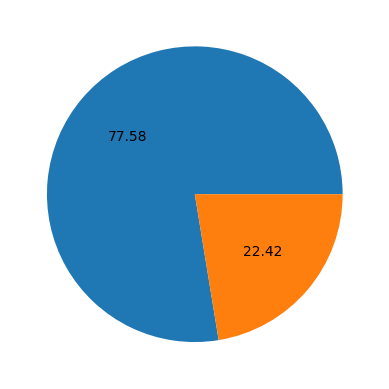

In [ ]:
plt.pie(y.value_counts(), autopct='%.2f');

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.7297854646901935

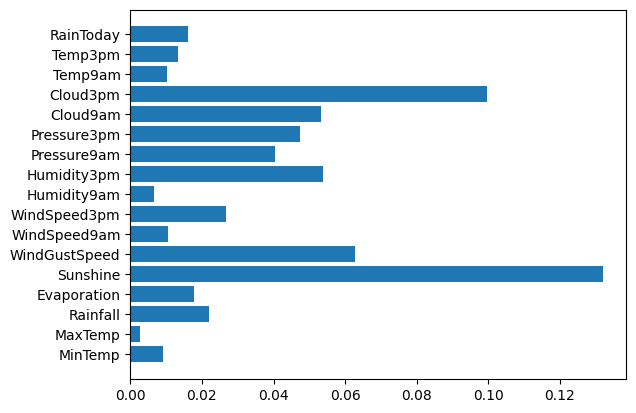

In [ ]:
plt.barh(X.columns, abs(lr.coef_[0]));

### Шаг 3 -  сравниваем с классификацией на ближайших соседях
- обучите классификатор kNN с параметрами по умолчанию
- получите долю правильных ответов для тестовой выборки
- сравните с результатом предыдущего шага

In [ ]:
lr1 = KNeighborsClassifier().fit(X_train, y_train)
y_pred1 = lr1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.8335443037974684

## Практика 2 - оптимизируем логистическую регрессию
### Шаг 1 -  подбираем параметры логистической регрессии
- используйте решетчатый поиск для оптимизации параметров регуляризации
- какая наилучшая средняя оценка получилась?
- на какой комбинации параметров?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lr = LogisticRegression()

params = {
    'C': np.arange(0.5, 10, 0.5)
}

gs = GridSearchCV(lr, params, cv=3, verbose=3)
gs.fit(X_test, y_test)

In [ ]:
gs.best_score_

0.8377327164741669

In [ ]:
gs.best_params_

{'C': 6.0}

### Шаг 2 -  Анализируем полученый результат
- обучите модель с оптимальными параметрами
- постройте график важности признаков и сравните с графиком из практики 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
lr = LogisticRegression(C = 6).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


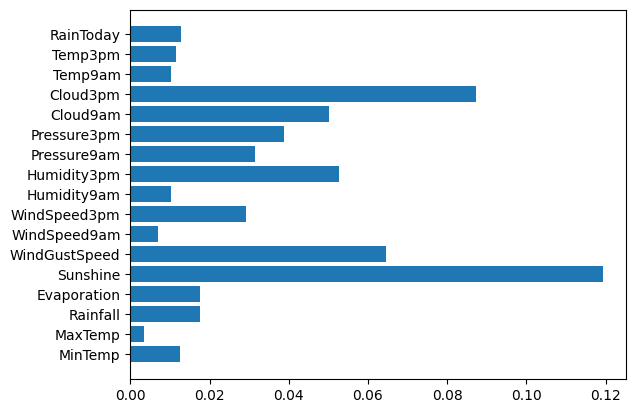

In [ ]:
plt.barh(X.columns, abs(lr.coef_[0]));

In [ ]:
lr = LogisticRegression(C = 0.01, penalty='l1', solver='saga').fit(X_train, y_train)